In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Generate the timestamps
timestamps = pd.date_range(start="2023-06-21 19:57:00", end="2024-06-20 01:51:00", freq='4min')

# Number of data points
n = len(timestamps)
print (n)

131129


In [9]:
#Generate inverse bell curve for electricity (more in the summers, less in the winters)
t = np.linspace(0, 2*np.pi, n)
electricity = ( 0.5 + 0.5 * np.cos(t)) *0.8+0.2  # Inverse bell curve, cosine starts high in summer
rain = 1.0 - ( 0.5 + 0.5 * np.cos(t)) 

# Generate random values for water
water = np.random.rand(n)


     
# Create the DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'water': water,
    'rain': rain,
    'electricity': electricity
})

#prune rain
indices_to_zero = np.random.choice(df.index, size=int(0.999 * len(df)), replace=False)
df.loc[indices_to_zero, 'rain'] = 0

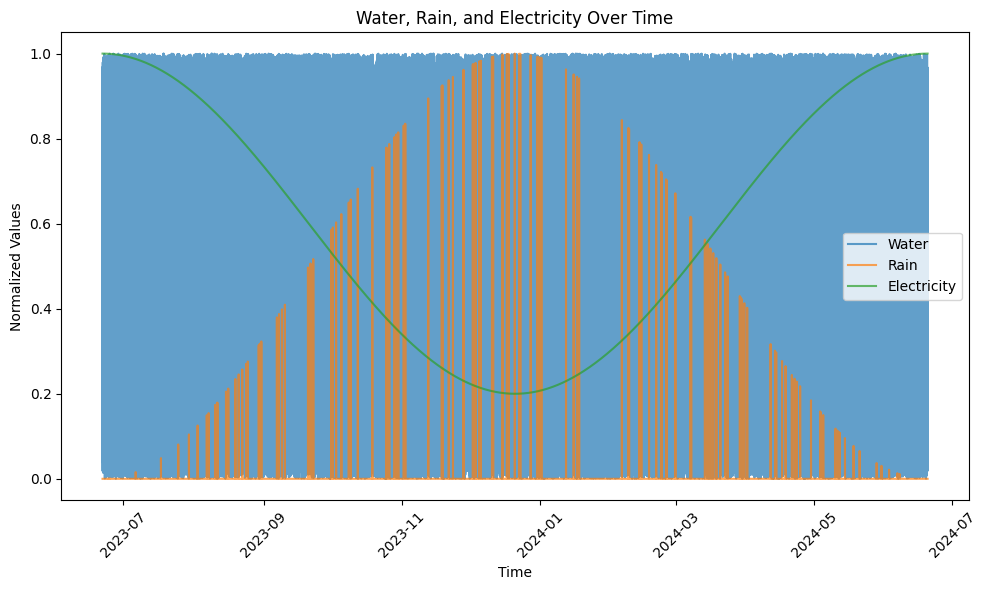

In [10]:
# Plot all columns
plt.figure(figsize=(10, 6))

plt.plot(df['timestamp'], df['water'], label='Water', alpha=0.7)
plt.plot(df['timestamp'], df['rain'], label='Rain', alpha=0.7)
plt.plot(df['timestamp'], df['electricity'], label='Electricity', alpha=0.7)

plt.title("Water, Rain, and Electricity Over Time")
plt.xlabel("Time")
plt.ylabel("Normalized Values")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
df.to_csv('./data/generated.csv')